
это файл к  задаче для деконволюции двумерной картинки.  В файле размытая картинка. Она размыта с гауссианой, у которой дисперсия (то есть сигма в знаменателе показателя степени) равна 10

Задача — получить оригинальную картинку

# Откроем исходное изображение

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#открываем файл
data = np.zeros([121,121])
with open("blurred.dat") as f:
      for line in f:
          i,j,value = map(float,line.split(' '))
          data[int(i)+60,int(j)+60] = float(value)

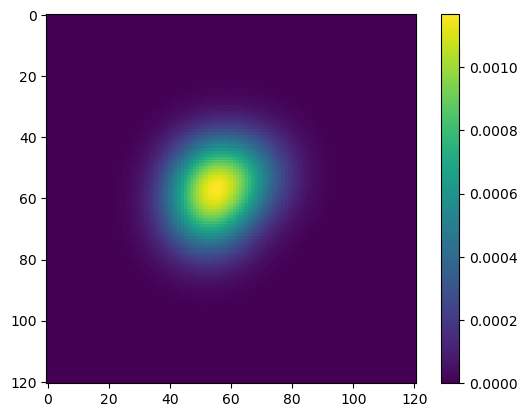

In [3]:
plt.imshow(data/np.sum(data))
plt.colorbar()

На изображении разрешается только один источник, попытаемся улучшить качества 


# Построим функцию размытия

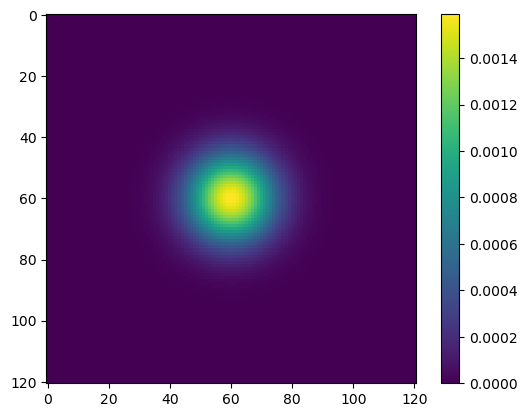

In [4]:
def gaussian_2d(x, y, sigma=1.0):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))
def gaussian_kernel(size, sigma=1.0):
    kernel = np.fromfunction(
        lambda x, y: gaussian_2d(x - (size - 1) / 2, y - (size - 1) / 2, sigma),
        (size, size)
    )
    return kernel / kernel.sum()
gaus_121 = gaussian_kernel(121,sigma=10)
plt.imshow(gaus_121)
plt.colorbar()

# Мое решение

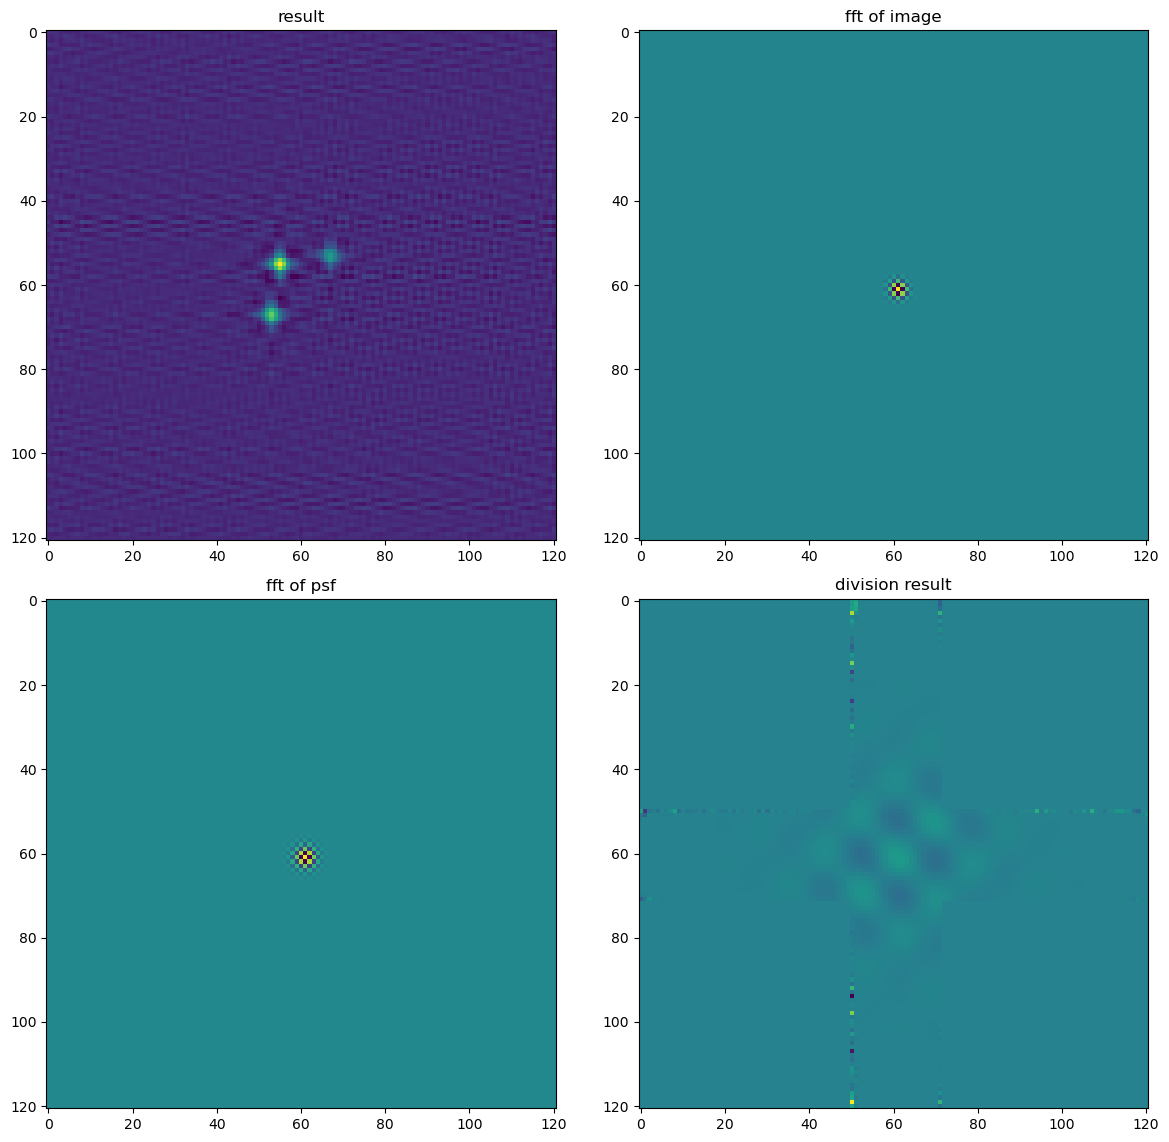

In [ ]:
'''
Идея, возьмем фурье образ от картинки и обрежем высокочастотные компоненты

В фурье пространстве избавиться от размытия можно обычным делением
'''
#функция размытия ФРТ
gaus_121 = gaussian_kernel(121,sigma=10)

#фурье образ картинки и ФРТ
fft_func = np.fft.fft2(data)
fft_gauss = np.fft.fft2(gaus_121)

#Востанавливаем изображение
s = fft_func/fft_gauss

#Параметр фильтрации
num_elements_to_zero = 99

# Вычисляем начальный и конечный индекс для зануления
start_idx = (121 - num_elements_to_zero) // 2
end_idx = start_idx + num_elements_to_zero

# Зануляем элементы в диапазоне
s[start_idx:end_idx,start_idx:end_idx] = 0

#Делаем обратное преобразование востанавливая исходную картину.
ifft_s = np.fft.ifftshift(np.fft.ifft2(s))

# Создание подграфиков (3 строки и 1 столбец)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))


axs[0,0].imshow(ifft_s.real)
axs[0,0].set_title('result')

axs[0,1].imshow(np.fft.ifftshift(fft_func.real))
axs[0,1].set_title('fft of image')

axs[1,0].imshow(np.fft.ifftshift(fft_gauss.real))
axs[1,0].set_title('fft of psf')

axs[1,1].imshow(np.fft.ifftshift(s.real))
axs[1,1].set_title('division result')



plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


# Изменим немного диссперсию Гаусса
на 2%

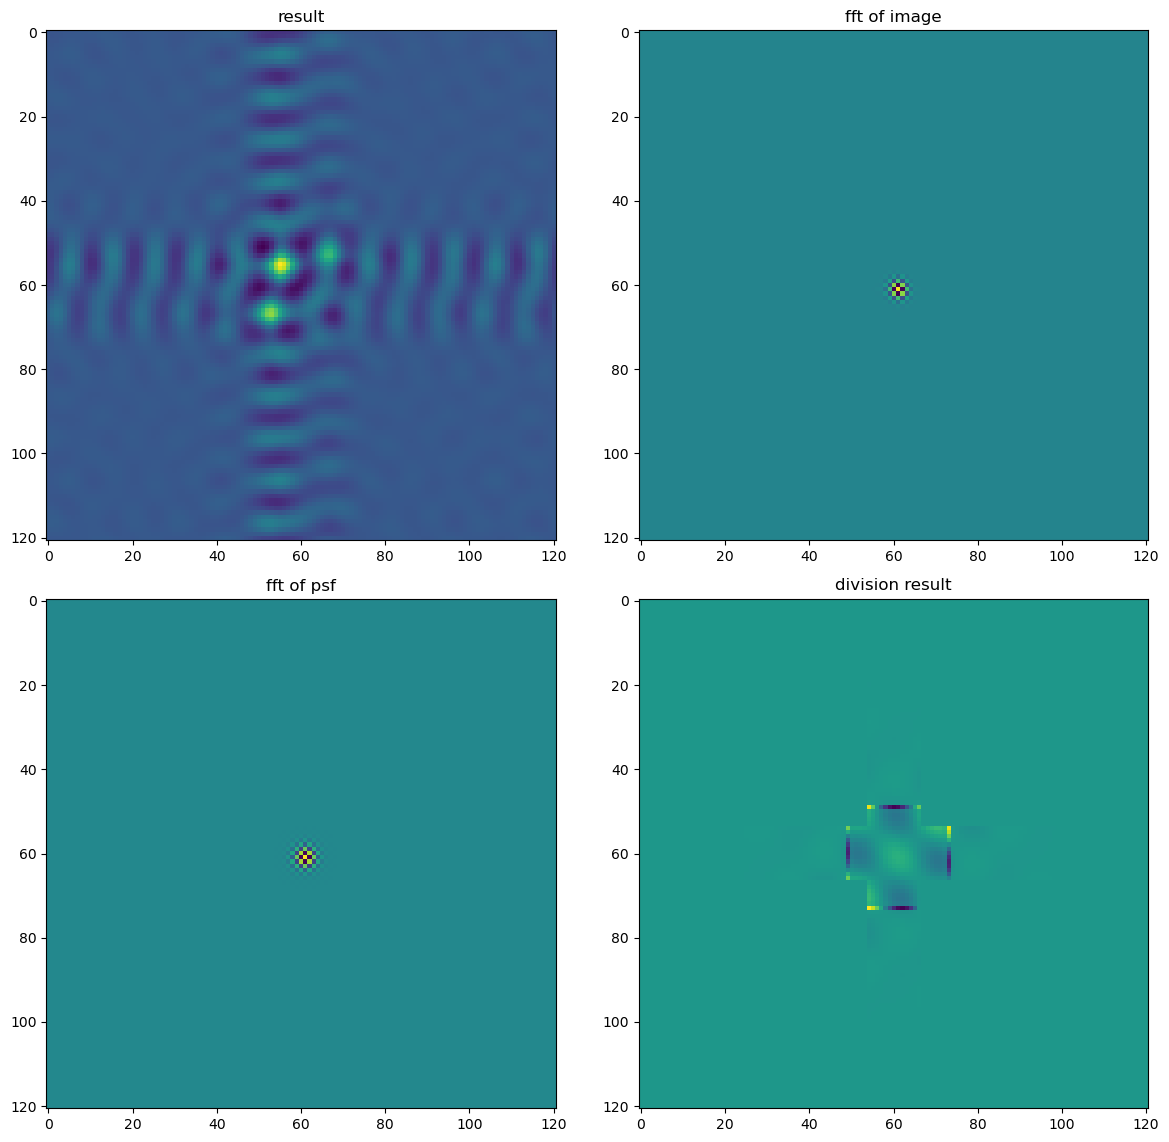

In [ ]:
#изменим дисперсию 
gaus_121 = gaussian_kernel(121,sigma=10.2)


fft_func = np.fft.fft2(data/np.sum(data))
fft_gauss = np.fft.fft2(gaus_121)

s = fft_func/fft_gauss

#фильтр s
num_elements_to_zero = 108
#Фильтр 1

# Вычисляем начальный и конечный индекс для зануления
start_idx = (121 - num_elements_to_zero) // 2
end_idx = start_idx + num_elements_to_zero

# Зануляем элементы в диапазоне
s[start_idx:end_idx,start_idx:end_idx] = 0
#####


ifft_s = np.fft.ifftshift(np.fft.ifft2(s))

# Создание подграфиков (3 строки и 1 столбец)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].imshow(ifft_s.real)
axs[0,0].set_title('result')


axs[0,1].imshow(np.fft.ifftshift(fft_func.real))
axs[0,1].set_title('fft of image')

axs[1,0].imshow(np.fft.ifftshift(fft_gauss.real))
axs[1,0].set_title('fft of psf')

axs[1,1].imshow(np.fft.ifftshift(s.real))
axs[1,1].set_title('division result')



plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

# Вывод
Я смог убрать влияние размытия. Также видно что при неточном задании параметров размытия изображение востанавливается хуже, но все равно можно разделить три объекта.